In [111]:
%matplotlib inline

import matplotlib
import autograd.numpy as np
import matplotlib.pyplot as plt
import random
import math
from autograd import grad

def generateChevronData():
    xBounds = [-50, 50]
    yBounds = [-50, 50]
    totalPoints = 100
    
    points = []
    targets = []
    
    for i in range(0, totalPoints):
        x = random.randint(xBounds[0], xBounds[1])
        y = random.randint(yBounds[0], yBounds[1])
        
        if x >= y and x <= -y:
            points.append([1, x/50.0,y/50.0])
            targets.append(0)
        else:
            points.append([1, x/50.0,y/50.0])
            targets.append(1)
        
    return np.array(points), np.array(targets)
    
def plotScatter(points):
    xs = [x[1] for x in points]
    ys = [y[2] for y in points]
    
    plt.scatter(xs, ys)

In [120]:
def sigmoid(phi):
    return 1.0/(1.0 + np.exp(-phi))

def MSE(weights):
    predictions = logisticPrediction(weights, points)
    return 1.0/2.0 * np.sum(np.power((targets - predictions), 2))

# def localLogLoss(weights):
#     predictions = logisticPrediction(weights, points)
#     print(targets)
#     print(predictions)
#     probs = predictions * targets + (1 - predictions) * (1 - targets)
#     print(predictions)
#     print(targets)
#     print(np.log(probs))
#     return -(1/len(points)) * np.sum(np.log(probs))

# def localLogLoss(weights, example):
#     return (predict(weights, example))

def logisticPrediction(weights, p):
    ins = np.array(list(map(lambda x: predict(weights, x), p)))
    return ins
    
def predict(weights, i):
    return sigmoid((i[2] - weights[2]) - weights[0] * (i[1] - weights[1]))

In [126]:
def computeGradient(weights, example, target):
    prediction = predict(weights, example)
    E = -np.log(target * prediction + (1-target) * (1-prediction))
    dE_dO = computeErrorDifferential(prediction, target)
    
    dO_dZ = prediction * (1-prediction)
    
    dZ_dy = -1
    dZ_dm = weights[1] - example[1]
    dZ_dx = weights[0]
    
    dE_dZ = dE_dO * dO_dZ
    
    grad = np.zeros(3)#[0.0, 0.0, 0.0]
    grad[0] = dZ_dm * dE_dZ
    grad[1] = dZ_dx * dE_dZ
    grad[2] = dZ_dy * dE_dZ
    
    return grad, E

def computeErrorDifferential(prediction, target):
    return -(target - prediction)
#     print(prediction, target)
#     if target == 1:
#         return -1/np.log(prediction)
    
#     return 1/np.log(1-prediction)

In [131]:
def trainBoundaryHunter():
    weights = np.array([0.0, 0.0, 1.0])
#     trainingGradient = grad(MSE)
    
    print("Initial Loss: ", MSE(weights))
    for i in range(0, 5000):
#         g = trainingGradient(weights) * 0.01
        if i % 1000 == 0:
            print()
            print("Loss Before: " + str(MSE(weights)))

        weights, error = computeStep(weights)
#         weights -= g
    
        if i % 1000 == 0:
            print("Loss After [i = " + str(i) + "]: " + str(MSE(weights)))
            print(weights)
            
    print("Trained Loss: ", MSE(weights))    
    print("Weights: ", weights)
    return weights

def computeStep(weights):
    totalG = np.zeros(3)
    totalE = 0
    for i in range(0, len(points)):
        g, error = computeGradient(weights, points[i], targets[i])
        totalE += error
        totalG += g     
        
    totalG = totalG * (1/len(points))
    totalE = totalE * (1/len(points))
        
    weights -= totalG * 0.01
    return weights, totalE

Type 0:  35
Type 1:  65
Initial Loss:  16.071361585

Loss Before: 16.071361585
Loss After [i = 0]: 16.0645485641
[ -1.09872316e-05   0.00000000e+00   9.99174650e-01]

Loss Before: 10.5732644464
Loss After [i = 1000]: 10.5695814829
[-0.03646671 -0.00977395  0.26200274]

Loss Before: 8.38977288885
Loss After [i = 2000]: 8.38868256335
[-0.10009102 -0.0390594  -0.19243409]

Loss Before: 7.78772543189
Loss After [i = 3000]: 7.78743922549
[-0.15728617 -0.06839966 -0.4243727 ]

Loss Before: 7.62870085544
Loss After [i = 4000]: 7.62862354172
[-0.19982366 -0.0886823  -0.53882979]
Trained Loss:  7.58464854532
Weights:  [-0.23024284 -0.10075366 -0.59521701]


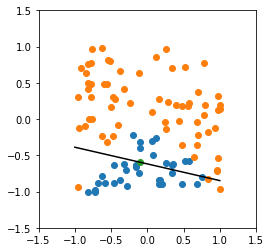

In [132]:
random.seed(1234)
points, targets = generateChevronData()

plt.axis([-1.5, 1.5, -1.5, 1.5])

# Plot points on graph
c1 = []
c2 = []

for i in range(0, len(points)):
    if targets[i] == 0:
        c1.append(points[i])
    else:
        c2.append(points[i])

print("Type 0: ", len(c1))
print("Type 1: ", len(c2))
        
plotScatter(c1)
plotScatter(c2)

weights = trainBoundaryHunter()
plt.scatter(weights[1], weights[2])
plt.plot([-1.0, 1.0], [weights[2] + weights[0]*((-1) - weights[1]), weights[2] + weights[0]*(1 - weights[1])], 'k-')
plt.gca().set_aspect('equal')

plt.show()